# Transferencia de aprendizaje con _perros y gatos_

## Clasificar con redes preentrenadas

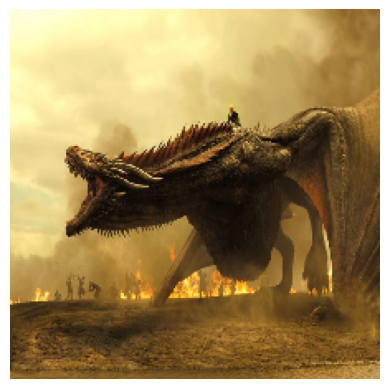

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

img = load_img("./dragon1.jpg", target_size=(224, 224))  # dragon1.jpg, cat1.jpg
img_array = img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras.applications import ResNet50

resnet50_model = ResNet50(weights='imagenet')
# resnet50_model.summary()


In [12]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Preprocesar imagen para el modelo ResNet50
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
processed_img = preprocess_input(img_array_expanded_dims)

# Realizar predicción
predictions = resnet50_model.predict(processed_img)

# Decodificar y mostrar las 3 predicciones principales
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {imagenet_id} {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1: n01704323 triceratops (0.53)
2: n01688243 frilled_lizard (0.06)
3: n02317335 starfish (0.05)


## Descargar datos

Descargar y descomprimir [fichero de datos](https://drive.google.com/open?id=1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b&usp=drive_fs).

In [ ]:
import os
import zipfile

if not os.path.exists('cats_and_dogs_small'):
    !gdown 1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b

    with zipfile.ZipFile('cats_and_dogs_small.zip', 'r') as zip_ref:
        zip_ref.extractall()

    folders = os.listdir('cats_and_dogs_small')
    print(folders)

Configurar directorios.

In [ ]:
train_dir      = './cats_and_dogs_small/train/'
validation_dir = './cats_and_dogs_small/validation/'
test_dir       = './cats_and_dogs_small/test/'